# The Spark Foundation

## Data Science And Bussiness Analytics(Task- 5)

### Exploratory Data Analysis - Sports (Level - Advanced)
####  Author : Shivam Kumar
 - In this task, we have to perform exploratory data analysis on 'Indian Premiere League'.
 - As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
 - Dataset : https://bit.ly/34SRn3b

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading Datasets
df=pd.read_csv('matches.csv')
print('Data Imported Successfully.')

Data Imported Successfully.


In [3]:
df1=pd.read_csv('deliveries.csv')
print('Data Imported Successfully.')

Data Imported Successfully.


In [4]:
df1.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
pd.DataFrame(df.shape,index=['Row','Column'],columns=['Number_of '])# checking shape of the data

,Number_of
Row,756
Column,18


 - There are 756 Rows and 18 Columns present in this Dataset.

### Checking Duplicate value

In [7]:
df.duplicated().sum()

0

 - There are no Duplicate Value present in the Datasets.

### Statistical information

In [8]:
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


### Columns And Their Data Types

In [9]:
df.dtypes.to_frame('Data Types')

,Data Types
id,int64
season,int64
city,object
date,object
team1,object
team2,object
toss_winner,object
toss_decision,object
result,object
dl_applied,int64


### Checking Missing Values 

In [10]:
df.isnull().sum().to_frame('Missing_Values')

,Missing_Values
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


In [11]:
pd.DataFrame(df.isnull().sum()*100/len(df),columns=['Missing_%'])#Checking the percentage of null Values.

,Missing_%
id,0.000000
season,0.000000
city,0.925926
date,0.000000
team1,0.000000
team2,0.000000
toss_winner,0.000000
toss_decision,0.000000
result,0.000000
dl_applied,0.000000


In [12]:
df.drop(columns=['umpire1','umpire2','umpire3'], axis=1,inplace=True)

In [13]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


 - We are droping Umpire columns because these are not useful columns. 

In [14]:
df['season'].value_counts()# Checking No. of matches played in each Seasons.

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

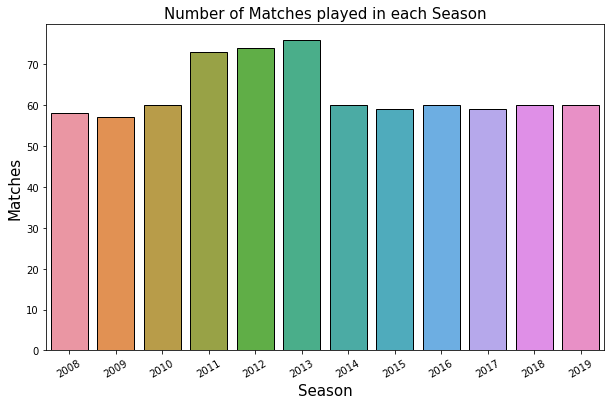

In [15]:
# Visualizing No. of matches played in each Seasons
plt.figure(figsize=(10,6))
sns.countplot(df['season'],edgecolor='black')
plt.title("Number of Matches played in each Season",fontsize=15)
plt.xlabel("Season",fontsize=15)
plt.ylabel('Matches',fontsize=15)
plt.xticks(rotation=30)
plt.show()

In [16]:
df['city'].value_counts()# Checking No. of matches played in each City.

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Mohali             10
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Abu Dhabi           7
Port Elizabeth      7
Cape Town           7
Ranchi              7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
Kimberley           3
Nagpur              3
East London         3
Bloemfontein        2
Name: city, dtype: int64

In [17]:
df['winner'].value_counts()#Checking Most Matches Win by a Team.

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

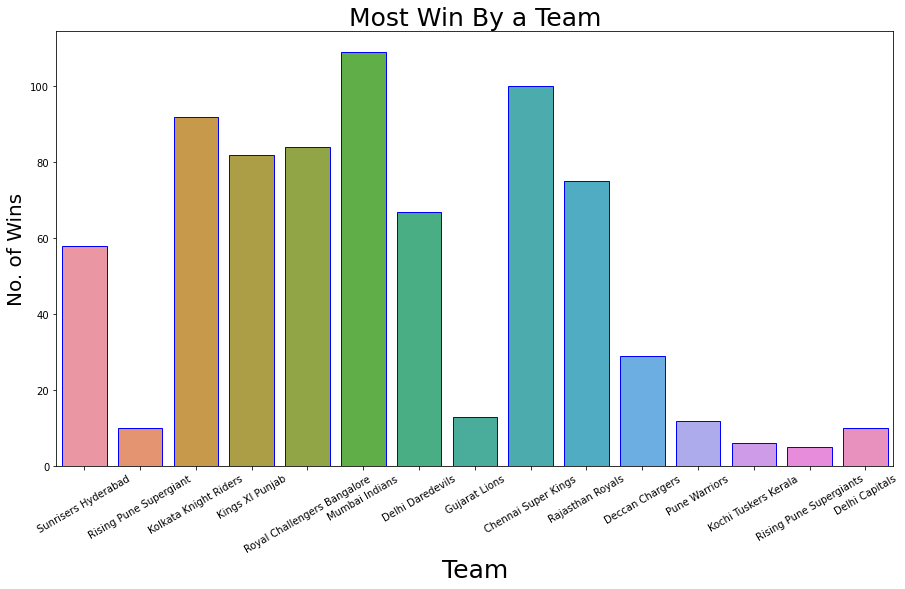

In [18]:
plt.figure(figsize=(15,8))
sns.countplot(df['winner'],edgecolor='blue')
plt.title('Most Win By a Team',size=25)
plt.xlabel('Team',size=25)
plt.ylabel('No. of Wins',size=20)
plt.xticks(rotation=30)
plt.show()

In [19]:
df['player_of_match'].value_counts()#Checking for player of the Match.

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
                  ..
LJ Wright          1
Q de Kock          1
RE Levi            1
LR Shukla          1
TA Boult           1
Name: player_of_match, Length: 226, dtype: int64

In [20]:
top_player=df['player_of_match'].value_counts()[0:5]#Checking for Top five player of The match.

In [21]:
top_player

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
Name: player_of_match, dtype: int64

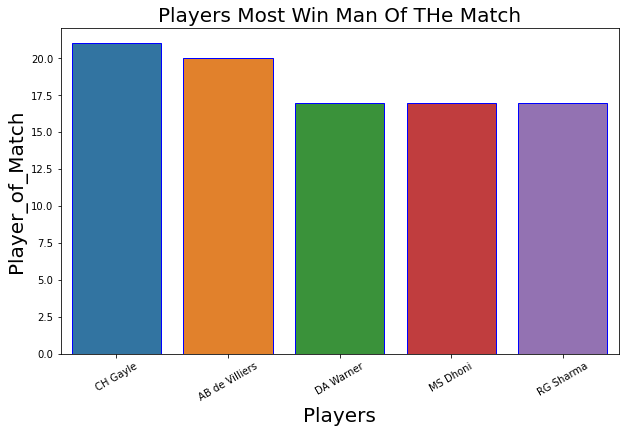

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x = top_player.index, y = top_player,edgecolor='blue')
plt.title('Players Most Win Man Of THe Match',size=20)
plt.xlabel('Players',size=20)
plt.ylabel('Player_of_Match',size=20)
plt.xticks(rotation=30)
plt.show()

In [26]:
#toss impact on winner
np.sum(df['toss_winner']==df['winner'])

393

In [27]:
imp=393/756
imp

0.5198412698412699

 - ### Winning toss doesn't have impact on match winner

In [34]:
finalmatch=df.drop_duplicates(subset=['season'], keep='last')

finalmatch[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008,Rajasthan Royals
2,2009,Deccan Chargers
3,2010,Chennai Super Kings
4,2011,Chennai Super Kings
5,2012,Kolkata Knight Riders
6,2013,Mumbai Indians
7,2014,Kolkata Knight Riders
8,2015,Mumbai Indians
9,2016,Sunrisers Hyderabad
0,2017,Mumbai Indians


In [188]:
#season won by teams
F=finalmatch["winner"].value_counts()
F

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Sunrisers Hyderabad      1
Deccan Chargers          1
Name: winner, dtype: int64

In [39]:
df['win_by']=np.where(df['win_by_runs']>0,'Bat first','Bowl first')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,win_by
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",Bat first
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,Bowl first
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Bowl first
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,Bowl first
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,Bat first


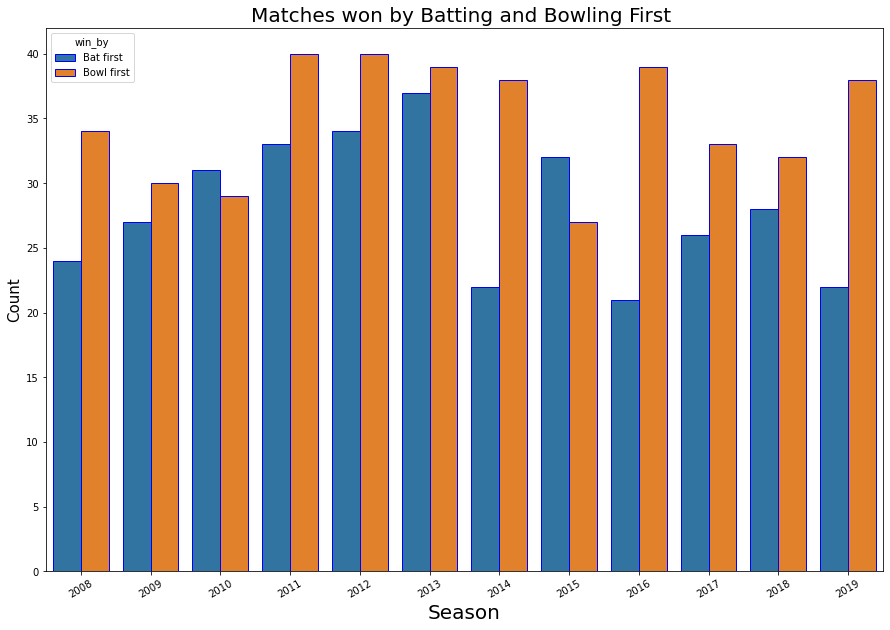

In [52]:
plt.figure(figsize = (15,10))
sns.countplot('season',hue='win_by',data=df,edgecolor='blue')
plt.title("Matches won by Batting and Bowling First ",size=20)
plt.xlabel("Season",size=20)
plt.ylabel("Count",size=15)
plt.xticks(rotation=30)
plt.show()

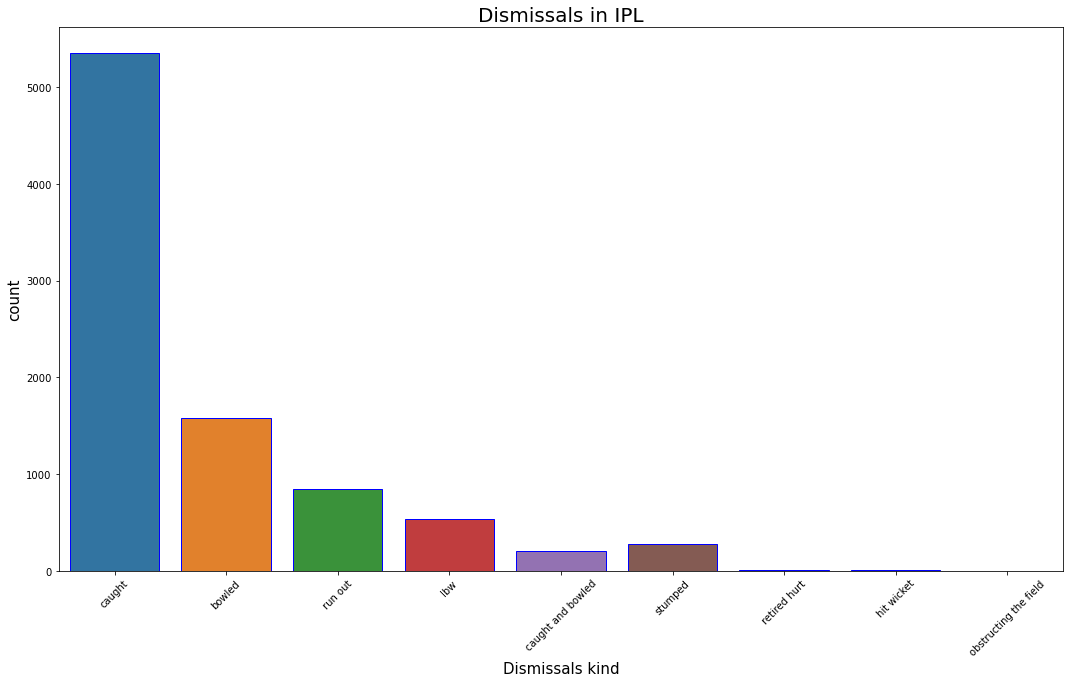

In [55]:
plt.figure(figsize=(18,10))
sns.countplot(df1.dismissal_kind,edgecolor='blue')
plt.title("Dismissals in IPL",size=20)
plt.xlabel("Dismissals kind",size=15)
plt.ylabel("count",size=15)
plt.xticks(rotation=45)
plt.show()

In [134]:
wicketdata=df1.dropna(subset=['dismissal_kind'])
wicketdata=wicketdata[~wicketdata['dismissal_kind'].isin(['run out','retired hurt','obstructing the field'])]

In [149]:
wicketdata.groupby('bowler')['dismissal_kind'].agg(['count']).reset_index().sort_values('count',ascending=False).reset_index(drop=True).iloc[:10,:]

,bowler,count
0,SL Malinga,170
1,A Mishra,156
2,Harbhajan Singh,150
3,PP Chawla,149
4,DJ Bravo,147
5,B Kumar,133
6,R Ashwin,125
7,SP Narine,122
8,UT Yadav,119
9,RA Jadeja,108


In [147]:
bb = df1.groupby(["batsman"]).runs.sum().reset_index()
bb=bb.set_index('batsman').sort_values(by=['runs'],ascending=False)[0:5]

In [148]:
bb

,runs
batsman,
V Kohli,5434
SK Raina,5415
RG Sharma,4914
DA Warner,4741
S Dhawan,4632


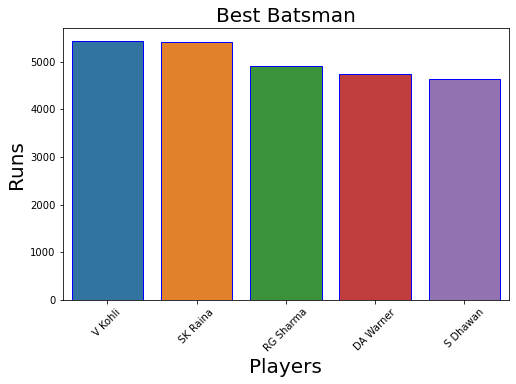

In [141]:
plt.figure(figsize=(8,5))
sns.barplot(x=bb.index, y=bb['runs'],edgecolor='blue')
plt.title('Best Batsman',size=20)
plt.xlabel('Players',size=20)
plt.ylabel('Runs',size=20)
plt.xticks(rotation=45)
plt.show()

 - ### V Kohli has highest runs.

In [150]:
seasondata=df[['id','season','winner']]
complete_d=df1.merge(seasondata,how='inner',left_on='match_id',right_on='id')

In [152]:
six_data=complete_d[complete_d['runs']==6]
six_data.groupby('batting_team')['runs'].agg([('runs by six','sum'),('sixes','count')])

,runs by six,sixes
batting_team,,
Chennai Super Kings,5838,973
Deccan Chargers,2400,400
Delhi Capitals,522,87
Delhi Daredevils,4806,801
Gujarat Lions,930,155
Kings XI Punjab,5856,976
Kochi Tuskers Kerala,318,53
Kolkata Knight Riders,5580,930
Mumbai Indians,6576,1096


In [154]:
four_data=complete_d[complete_d['runs']==4]
four_data.groupby('batting_team')['runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772,2193
Deccan Chargers,3828,957
Delhi Capitals,968,242
Delhi Daredevils,8632,2158
Gujarat Lions,1840,460
Kings XI Punjab,9832,2458
Kochi Tuskers Kerala,680,170
Kolkata Knight Riders,9736,2434
Mumbai Indians,10352,2588


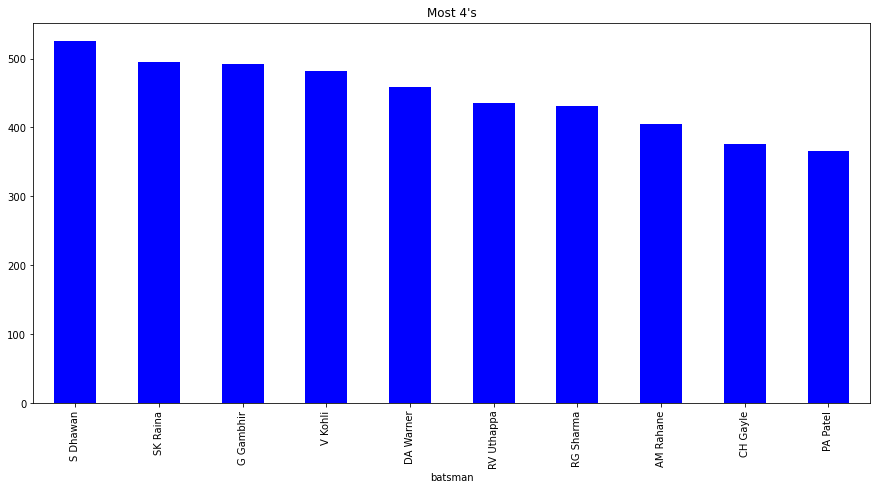

In [167]:
#player with most 4's
ply4 = df1[df1["runs"] == 4].groupby("batsman")["runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", title="Most 4's", figsize=(15,7), color="b")
plt.show()

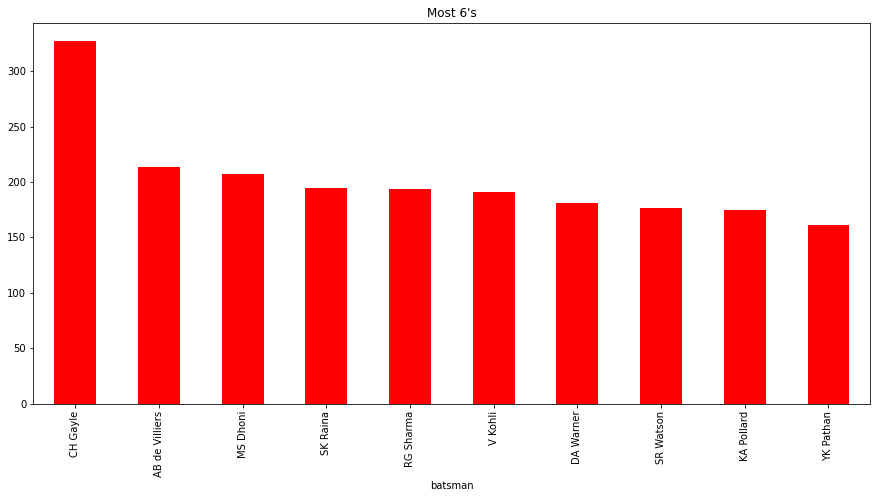

In [157]:
#player with most 6's
ply4 = df1[df1["runs"] == 6].groupby("batsman")["runs"].count().sort_values(ascending = False).head(10).plot(kind="bar", title="Most 6's", figsize=(15,7), color="red")
plt.show()


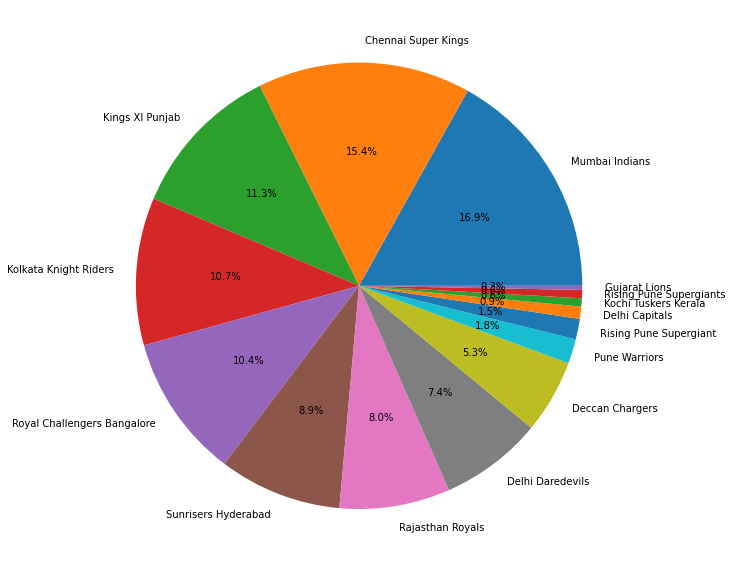

In [163]:
batting_first=df[df['win_by_runs']!=0]
plt.figure(figsize=(10,15))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()), autopct='%0.1f%%')
plt.show()

# Conclusion :

 - The highest number of matches was played in 2013's Season.
 - Mumbai Indian is the most successful team in IPL with 4 titles.
 - Top Player of match winning are CH Gayle and AB de villers.
 - The highest number of four hitted by Shikar Dhawan.
 - The highest number of six hitted by CH Gayl.
 - Most dismissal in IPL was by Catch out.
 - Toss doesn't have impact on match's winner.
 - Malinga has taken the most number of wickets in IPL.
 - Top lead run scorer in IPL are Virat Kohli, SK Raina, RG Sharma.

##      ------------------------------- Thank You ----------------------------------------------